In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from utils import metrics
from utils import models
from utils import plots

np.set_printoptions(suppress=True)

In [3]:
X1 = [3.2, 5.1,-1.7]
X2 = [1.3, 4.9, 2.0]
X3 = [2.2, 2.5, -3.1]
y_true = np.array([0,0,0,0,1,0,0,1,1,1])
y_pred= np.array([0,0,0,0,0,1,1,1,1,1])

In [4]:
iris = datasets.load_iris()
X = iris['data']
X = X[:, [0, 2]]
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
def recall(y_true, y_pred):

    recalls = []
    for class_idx in range(len(np.unique(y_true))):
        
        num_correct =len(np.where((y_true == class_idx) & (y_pred == class_idx))[0])
        total_true =  len(np.where(y_true == class_idx)[0])
        print(num_correct, total_true)
        if total_true == 0:
            recalls.append(0)
        else:            
            recalls.append(num_correct / total_true)
    
    return np.array(recalls)


In [10]:
model = models.K_Nearest_Neighbors(3)
model.fit(X_train, y_train)
preds, y_true = model.predict(X_test, y_test)
metrics.accuracy(y_true, preds)
recall(y_true, preds)

0 6
0 13
0 11


array([0., 0., 0.])

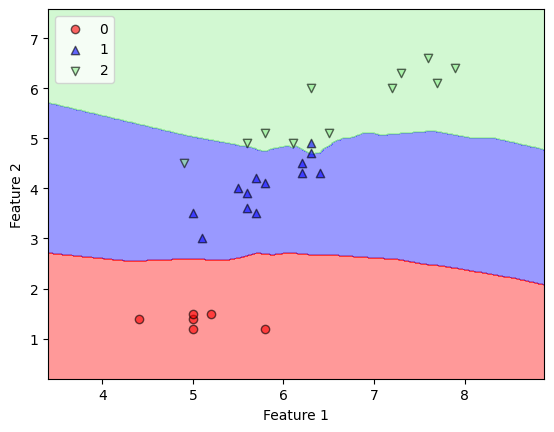

Accuracy: 0.9
Recall: [0. 0. 0.]


In [6]:
plots.plot_decision_regions(X_test, y_test, model, return_metrics=True)